In [33]:
# Import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive 
drive.mount('/content/drive/') 

Mounted at /content/drive/


In [3]:
df = pd.read_csv('/content/drive/MyDrive/SampleSuperstore.csv')

In [4]:
# Top 5 rows
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
# Finding the dtypes of Columns to get some Insights
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
# Finding null values in dataset
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
# Using descriptive Statistics to find some insights
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
# Adding a new column 'Profit Margin %'
df['Profit Margin %'] = (df.Profit / df.Sales)*100

**Correaltion heatmap**

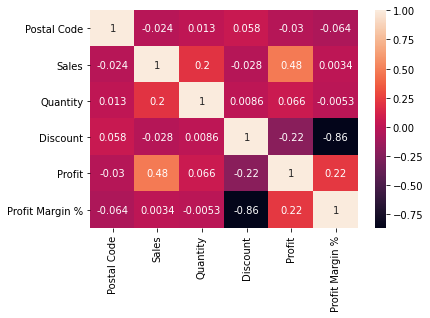

In [9]:
sns.heatmap(df.corr(), annot = True)

***Observation:***

Discount and Profit Margin % has a very high negative correlation

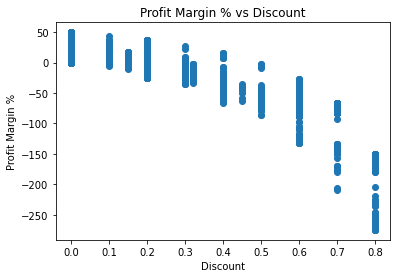

In [10]:
# Scatter plot between Profit Margin % and Discount
plt.scatter(df['Discount'], df['Profit Margin %'])
plt.xlabel('Discount')
plt.ylabel('Profit Margin %')
plt.title('Profit Margin % vs Discount')
plt.show()

# **Exploratory Data Analysis**

**1. Category**

In [11]:
category_df = pd.DataFrame(df.groupby(['Category'])[['Quantity','Sales','Profit']].sum())
category_df

,Quantity,Sales,Profit
Category,,,
Furniture,8028,741999.7953,18451.2728
Office Supplies,22906,719047.0320,122490.8008
Technology,6939,836154.0330,145454.9481


In [12]:
#Adding a new column
category_df['Profit Margin %'] = (category_df.Profit/category_df.Sales)*100

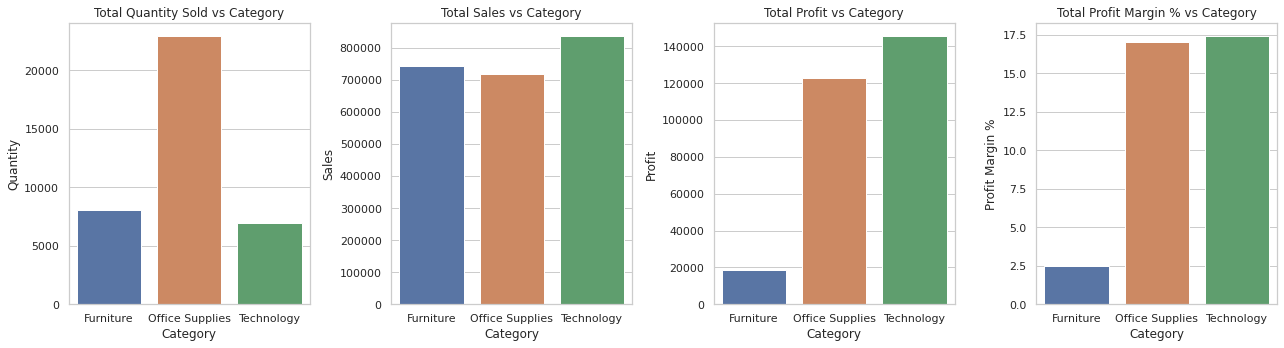

In [13]:
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(1,4, figsize=(18, 5))

# Plot barplots
cat1 = sns.barplot(x = category_df.index, y = category_df.Quantity, ax=axis[0])
cat2 = sns.barplot(x = category_df.index, y = category_df.Sales, ax=axis[1])
cat3 = sns.barplot(x = category_df.index, y = category_df.Profit, ax=axis[2])
cat4 = sns.barplot(x = category_df.index, y = category_df['Profit Margin %'], ax=axis[3])

# Set titles
cat1.set(title = 'Total Quantity Sold vs Category')
cat2.set(title = 'Total Sales vs Category')
cat3.set(title = 'Total Profit vs Category')
cat4.set(title = 'Total Profit Margin % vs Category')

# Set spacing between subplots
figure.tight_layout()

***Observations:***

Total sales for Furniture and Office Supplies is approximately same but Office Supplies gives much bigger profit than Furniture.

Total quantity sold for Furniture and Technology is approximately same but Technology gives much bigger profit than Furniture.

Technology gives the highest Profit Margin % and Total Profit.

**2. Sub-Category**

In [14]:
sub_category_df = pd.DataFrame(df.groupby(['Sub-Category'])[['Quantity','Sales','Profit']].sum())
sub_category_df

,Quantity,Sales,Profit
Sub-Category,,,
Accessories,2976,167380.3180,41936.6357
Appliances,1729,107532.1610,18138.0054
Art,3000,27118.7920,6527.7870
Binders,5974,203412.7330,30221.7633
Bookcases,868,114879.9963,-3472.5560
Chairs,2356,328449.1030,26590.1663
Copiers,234,149528.0300,55617.8249
Envelopes,906,16476.4020,6964.1767
Fasteners,914,3024.2800,949.5182


In [15]:
#Adding a new column
sub_category_df['Profit Margin %'] = (sub_category_df.Profit / sub_category_df.Sales)*100

In [16]:
# Sort in descending order according to Total Quantity Sold
sub_category_quantity = pd.DataFrame(sub_category_df.sort_values('Quantity', ascending = False))

# Sort in descending order according to Total Sales
sub_category_sales = pd.DataFrame(sub_category_df.sort_values('Sales', ascending = False))

# Sort in descending order according to Total Profit
sub_category_profit = pd.DataFrame(sub_category_df.sort_values('Profit', ascending = False))

# Sort in descending order according to Total Profit Margin %
sub_category_profit_margin = pd.DataFrame(sub_category_df.sort_values('Profit Margin %', ascending = False))

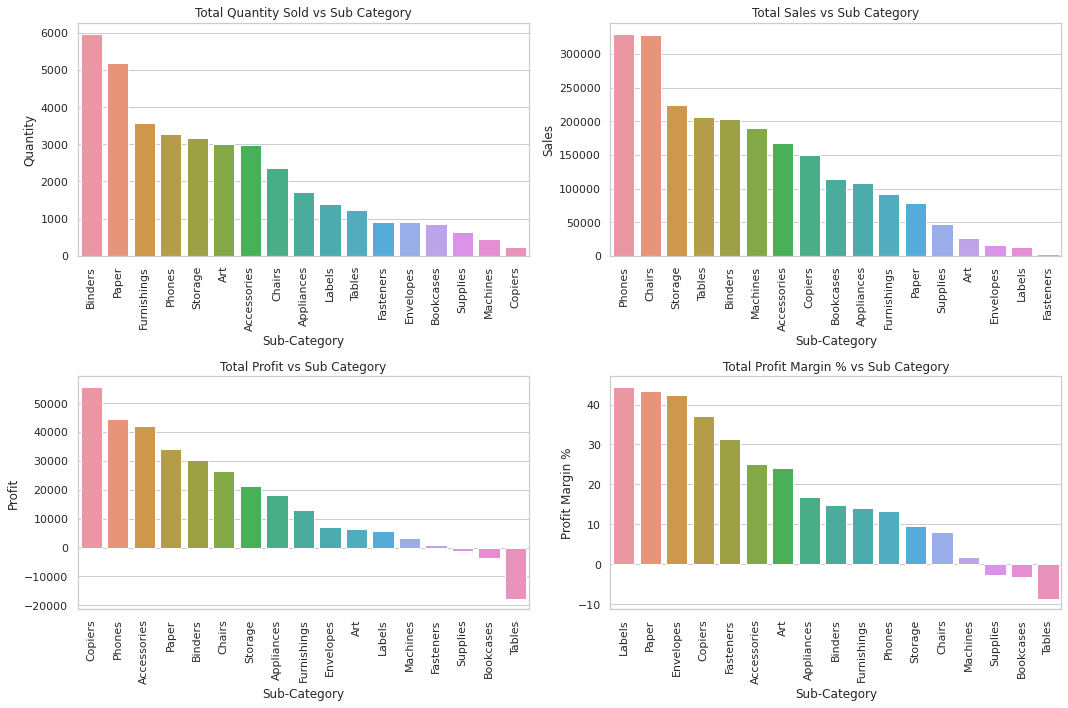

In [17]:
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(2,2, figsize=(15, 10))

# Plot barplots

#Quantity Sold
sub_cat1 = sns.barplot(x = sub_category_quantity.index, y = sub_category_quantity.Quantity, ax=axis[0][0])
sub_cat1.set_xticklabels(sub_cat1.get_xticklabels(),rotation = 'vertical')

#Sales
sub_cat2 = sns.barplot(x = sub_category_sales.index, y = sub_category_sales.Sales, ax=axis[0][1])
sub_cat2.set_xticklabels(sub_cat2.get_xticklabels(),rotation = 'vertical')

#Profit
sub_cat3 = sns.barplot(x = sub_category_profit.index, y = sub_category_profit.Profit, ax=axis[1][0])
sub_cat3.set_xticklabels(sub_cat3.get_xticklabels(),rotation = 'vertical')

#Profit Margin %
sub_cat4 = sns.barplot(x = sub_category_profit_margin.index, y = sub_category_profit_margin['Profit Margin %'], ax=axis[1][1])
sub_cat4.set_xticklabels(sub_cat4.get_xticklabels(),rotation = 'vertical')

# Set titles
sub_cat1.set(title = 'Total Quantity Sold vs Sub Category')
sub_cat2.set(title = 'Total Sales vs Sub Category')
sub_cat3.set(title = 'Total Profit vs Sub Category')
sub_cat4.set(title = 'Total Profit Margin % vs Sub Category')

# Set spacing between subplots
figure.tight_layout()

***Observations:***

Copiers gives highest Total Profit but its Quantity Sold is least among all sub categories.

Labels has highest Profit Margin % has very less contribution to Total Sales.

**3. Segment**

In [18]:
segment_df = pd.DataFrame(df.groupby(['Segment'])[['Quantity','Sales','Profit']].sum())
segment_df

,Quantity,Sales,Profit
Segment,,,
Consumer,19521,1.161401e+06,134119.2092
Corporate,11608,7.061464e+05,91979.1340
Home Office,6744,4.296531e+05,60298.6785


In [19]:
#Adding a new column
segment_df['Profit Margin %'] = (segment_df.Profit / segment_df.Sales) * 100

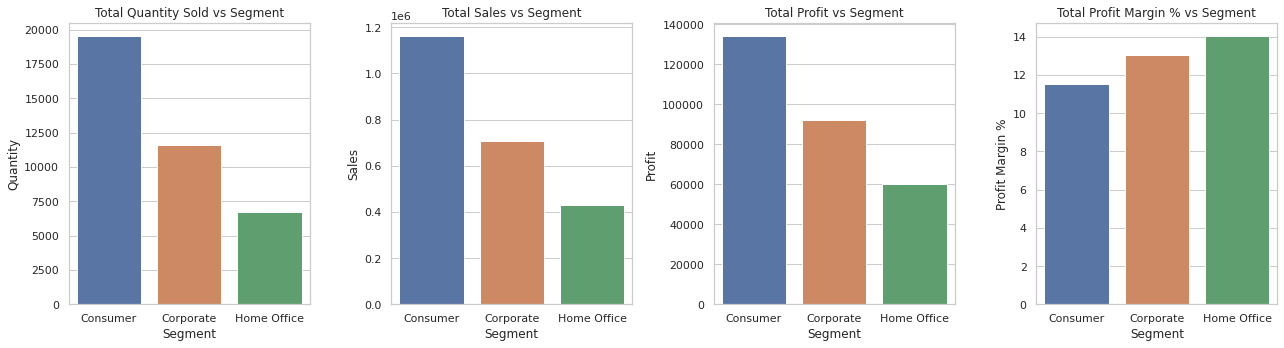

In [20]:
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(1, 4, figsize=(18, 5))

# Plot barplots
seg1 = sns.barplot(x = segment_df.index, y = segment_df.Quantity, ax=axis[0])
seg2 = sns.barplot(x = segment_df.index, y = segment_df.Sales, ax=axis[1])
seg3 = sns.barplot(x = segment_df.index, y = segment_df.Profit, ax=axis[2])
seg4 = sns.barplot(x = segment_df.index, y = segment_df['Profit Margin %'], ax=axis[3])

# Set titles
seg1.set(title = 'Total Quantity Sold vs Segment')
seg2.set(title = 'Total Sales vs Segment')
seg3.set(title = 'Total Profit vs Segment')
seg4.set(title = 'Total Profit Margin % vs Segment')

# Set spacing between subplots
figure.tight_layout()

***Observations:***

Home Office segment has the hisghest Profit Margin %.

Consumer segment gives highest Total Profit but lowest Profit Margin %. 

**4. Region**

In [21]:
region_df = pd.DataFrame(df.groupby(['Region'])[['Quantity','Sales','Profit']].sum())
region_df

,Quantity,Sales,Profit
Region,,,
Central,8780,501239.8908,39706.3625
East,10618,678781.2400,91522.7800
South,6209,391721.9050,46749.4303
West,12266,725457.8245,108418.4489


In [22]:
#Adding a new column
region_df['Profit Margin %'] = (region_df.Profit / region_df.Sales)*100

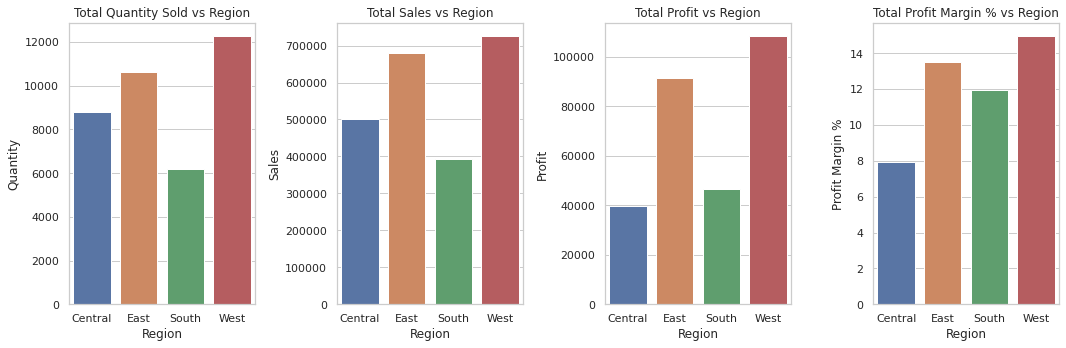

In [23]:
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(1, 4, figsize=(15, 5))

# Plot barplots
reg1 = sns.barplot(x = region_df.index, y = region_df.Quantity, ax=axis[0])
reg2 = sns.barplot(x = region_df.index, y = region_df.Sales, ax=axis[1])
reg3 = sns.barplot(x = region_df.index, y = region_df.Profit, ax=axis[2])
reg4 = sns.barplot(x = region_df.index, y = region_df['Profit Margin %'], ax=axis[3])

# Set titles
reg1.set(title = 'Total Quantity Sold vs Region')
reg2.set(title = 'Total Sales vs Region')
reg3.set(title = 'Total Profit vs Region')
reg4.set(title = 'Total Profit Margin % vs Region')

# Set spacing between subplots
figure.tight_layout()

***Observations:***

West region has highest Profit Margin %.

Central region has more sales than South region but South region gives more Profit than Central region.

**5. Ship Mode**

In [24]:
ship_mode_df = pd.DataFrame(df.groupby(['Ship Mode'])[['Quantity','Sales','Profit']].sum())
ship_mode_df

,Quantity,Sales,Profit
Ship Mode,,,
First Class,5693,3.514284e+05,48969.8399
Same Day,1960,1.283631e+05,15891.7589
Second Class,7423,4.591936e+05,57446.6354
Standard Class,22797,1.358216e+06,164088.7875


In [25]:
# Adding a new column
ship_mode_df['Profit Margin %'] = (ship_mode_df.Profit / ship_mode_df.Sales)*100

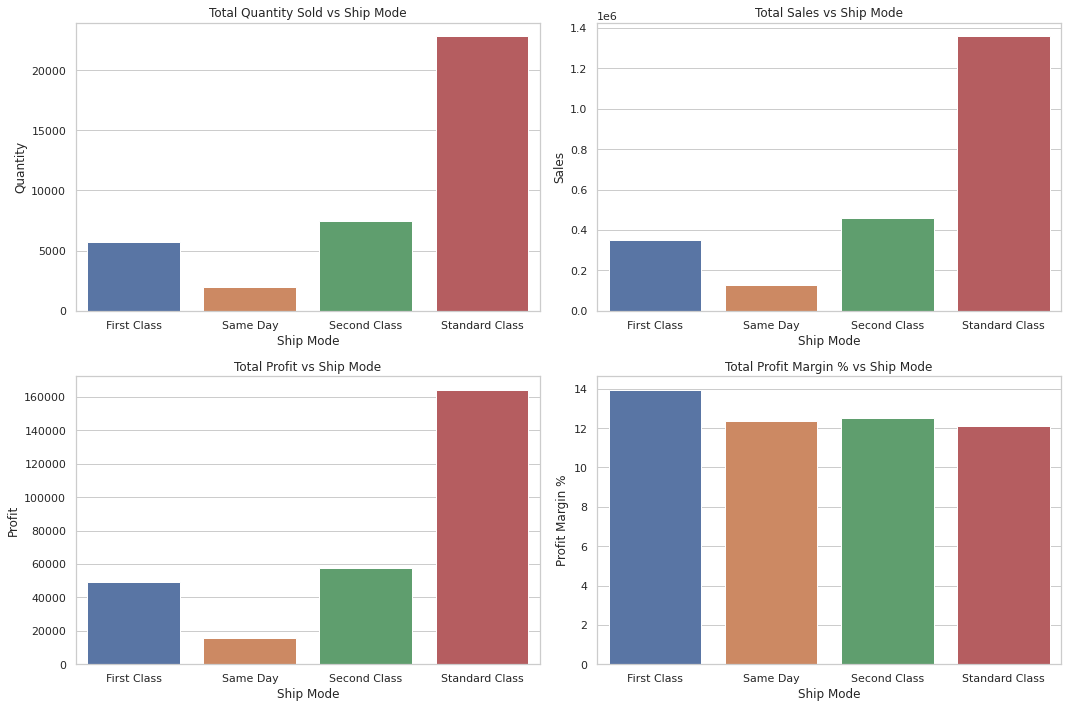

In [26]:
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(2,2, figsize=(15, 10))

# Plot barplots
sm1 = sns.barplot(x = ship_mode_df.index, y = ship_mode_df.Quantity, ax=axis[0][0])
sm2 = sns.barplot(x = ship_mode_df.index, y = ship_mode_df.Sales, ax=axis[0][1])
sm3 = sns.barplot(x = ship_mode_df.index, y = ship_mode_df.Profit, ax=axis[1][0])
sm4 = sns.barplot(x = ship_mode_df.index, y = ship_mode_df['Profit Margin %'], ax=axis[1][1])

# Set titles
sm1.set(title = 'Total Quantity Sold vs Ship Mode')
sm2.set(title = 'Total Sales vs Ship Mode')
sm3.set(title = 'Total Profit vs Ship Mode')
sm4.set(title = 'Total Profit Margin % vs Ship Mode')

# Set spacing between subplots
figure.tight_layout()

***Observations:***

First Class has highest Profit Margin %

Ship Mode has lowest Profit Margin % but it has highest contribution in Total Profit, Total Sales and Total Quantity Sold.

**6. City**

In [27]:
city_df= pd.DataFrame(df.groupby(['City'])[['Quantity', 'Sales', 'Profit']].sum())
city_df

,Quantity,Sales,Profit
City,,,
Aberdeen,3,25.500,6.6300
Abilene,2,1.392,-3.7584
Akron,65,2729.986,-186.6356
Albuquerque,65,2220.160,634.0881
Alexandria,84,5519.570,318.6183
...,...,...,...
Woonsocket,15,195.550,78.6791
Yonkers,57,7657.666,2767.7557
York,19,817.978,-102.1692


In [28]:
# Add new column
city_df['Profit Margin %'] = (city_df.Profit/city_df.Sales)*100

In [29]:
# Select top 10 and bottom 10 cities by Total Profit
top_10_profit = (city_df.sort_values('Profit',ascending = False)).head(10)
last_10_profit = (city_df.sort_values('Profit',ascending = False)).tail(10)

In [30]:
# Join top 10 and bottom 10 cities by Total Profit
city_top10_last10_profit = top_10_profit.append(last_10_profit)

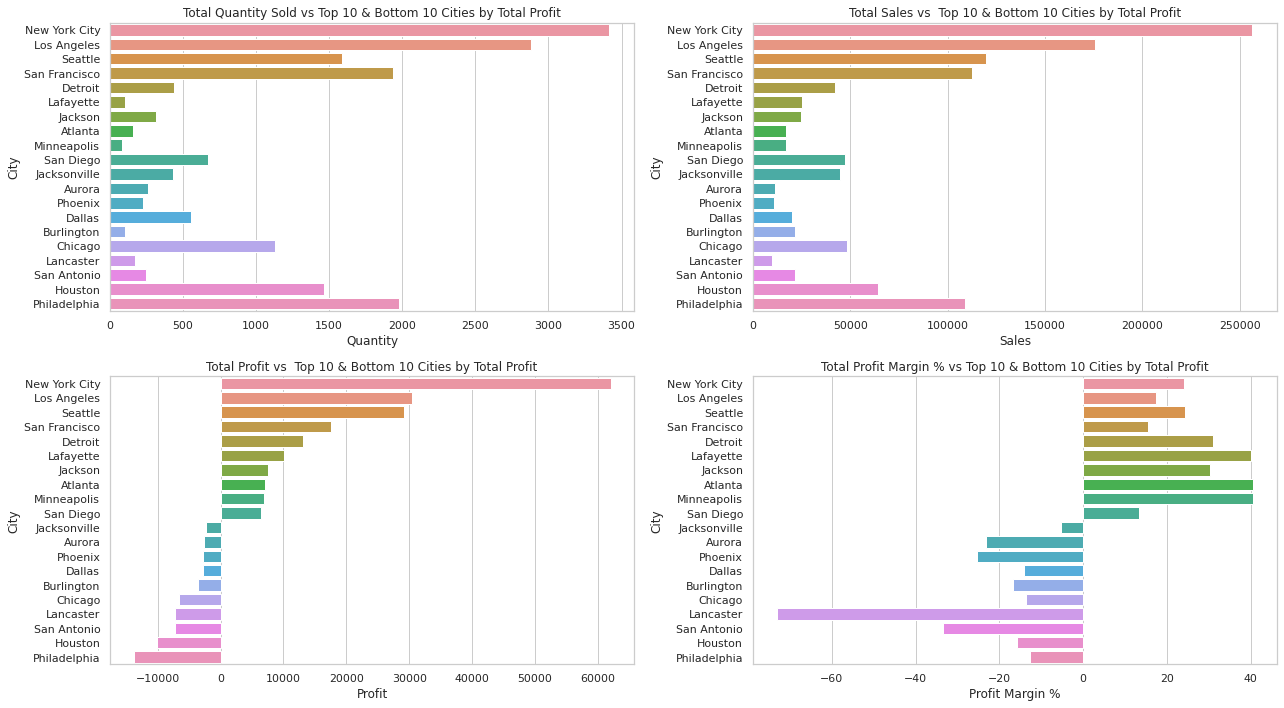

In [32]:
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(2,2, figsize=(18, 10))

# Plot barplots

# Quantity Sold by top 10 and bottom 10 cities by Total Profit
city_1 = sns.barplot(x = city_top10_last10_profit.Quantity,y = city_top10_last10_profit.index, ax=axis[0][0])

# Sales by top 10 and bottom 10 cities by Total Profit
city_2 = sns.barplot(x = city_top10_last10_profit.Sales,y = city_top10_last10_profit.index, ax=axis[0][1])

# Profit earned by top 10 and bottom 10 cities by Total Profit
city_3 = sns.barplot(x = city_top10_last10_profit.Profit,y = city_top10_last10_profit.index, ax=axis[1][0])

# Profit Margin % for top 10 and bottom 10 cities by Total Profit
city_4 = sns.barplot(x = city_top10_last10_profit['Profit Margin %'],y = city_top10_last10_profit.index, ax=axis[1][1])


# Set titles
city_1.set(title = 'Total Quantity Sold vs Top 10 & Bottom 10 Cities by Total Profit')
city_2.set(title = 'Total Sales vs  Top 10 & Bottom 10 Cities by Total Profit')
city_3.set(title = 'Total Profit vs  Top 10 & Bottom 10 Cities by Total Profit')
city_4.set(title = 'Total Profit Margin % vs Top 10 & Bottom 10 Cities by Total Profit')

# Set spacing between subplots
figure.tight_layout()

***Observations:***

New York gives the high Quantity, Sales and Profit but not that much Profit Margin %.

Philadelphia has decent Quantity and Sales but it has negative Profit and negative Profit Margin %.


**7. Total Orders**

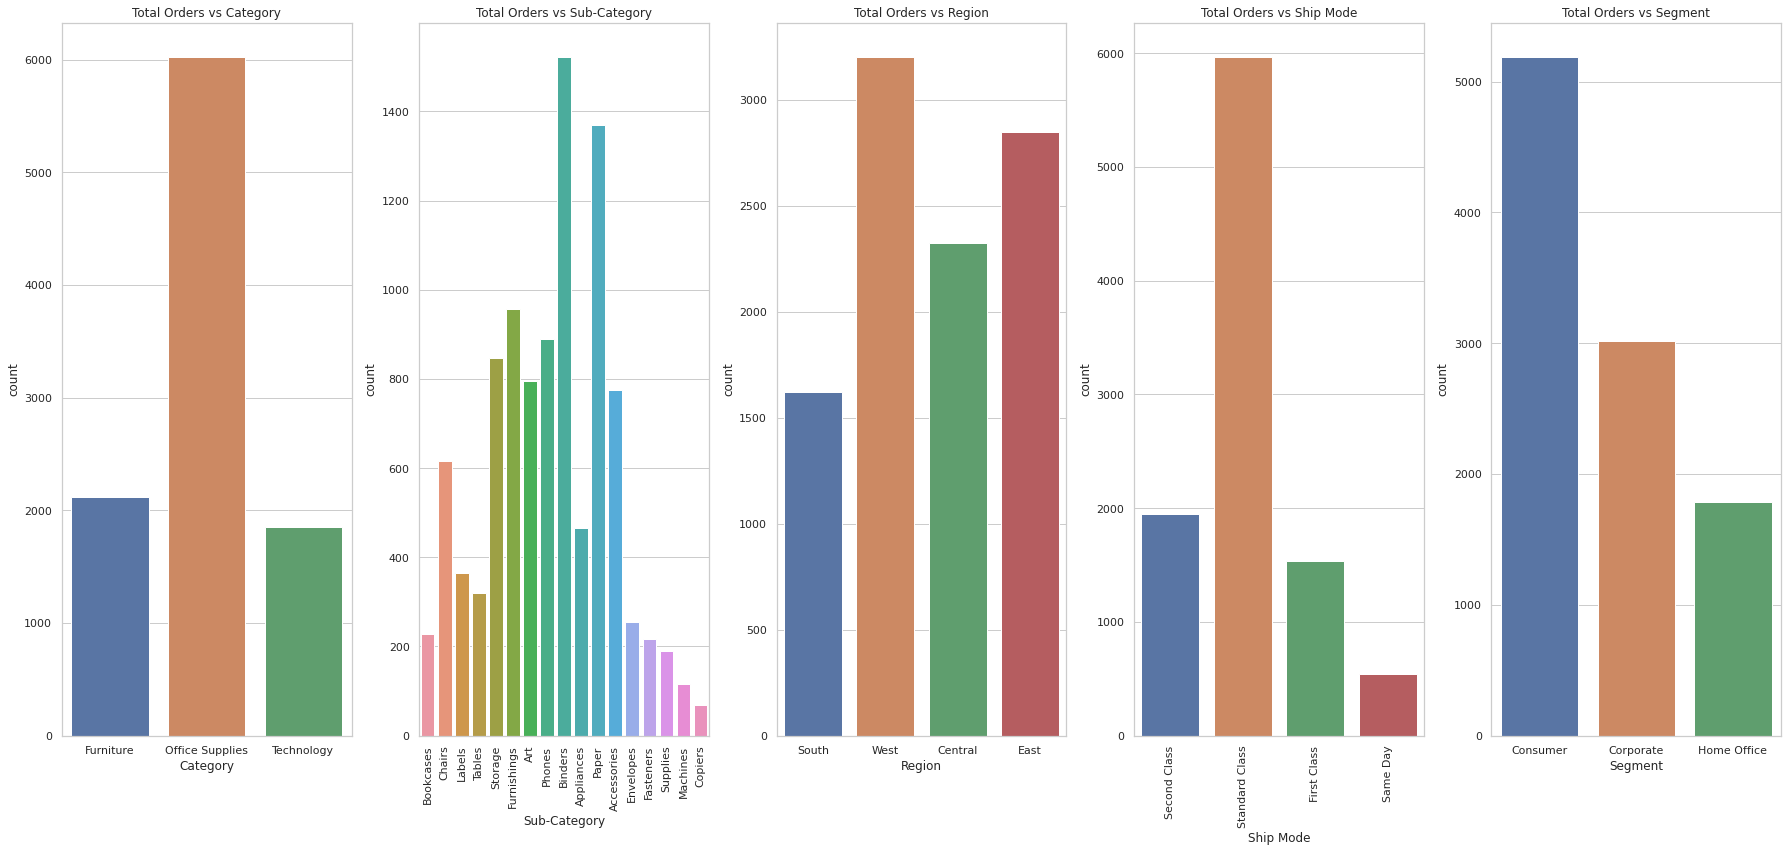

In [35]:
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(1,5, figsize=(25, 12))

# Plot countplots

# Category
category = sns.countplot(x = df['Category'], ax=axis[0])

# Sub category
sub_category = sns.countplot(x = df['Sub-Category'], ax=axis[1])
sub_category.set_xticklabels(sub_category.get_xticklabels(),rotation = 'vertical')

# Region
region = sns.countplot(x = df['Region'], ax=axis[2])

# Ship Mode
ship_mode = sns.countplot(x = df['Ship Mode'],  ax=axis[3])
ship_mode.set_xticklabels(ship_mode.get_xticklabels(),rotation = 'vertical')

# Segment
segment = sns.countplot(x = df['Segment'],  ax=axis[4])

# Set titles
category.set(title = 'Total Orders vs Category')
sub_category.set(title = 'Total Orders vs Sub-Category')
region.set(title = 'Total Orders vs Region')
ship_mode.set(title = 'Total Orders vs Ship Mode')
segment.set(title = 'Total Orders vs Segment')


# Set spacing between subplots
figure.tight_layout()